___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# Cross validation

Cross-validation is a statistical method used to estimate the skill of machine learning models. It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In this notebook we will see how to use cross validation in scikit-learn.
[see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html]

## Cross validation in scikit-learn: example

Let us start with a simple example. We will use the iris dataset and a Logistic Regression model. So, let us start by importing the necessary modules

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

Now, load the iris dataset 

In [2]:
iris = load_iris()

And define a Logistic Regression classification model. Remember, Logistic Regression is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Just by curiosity, let us see a plot for the logistic function

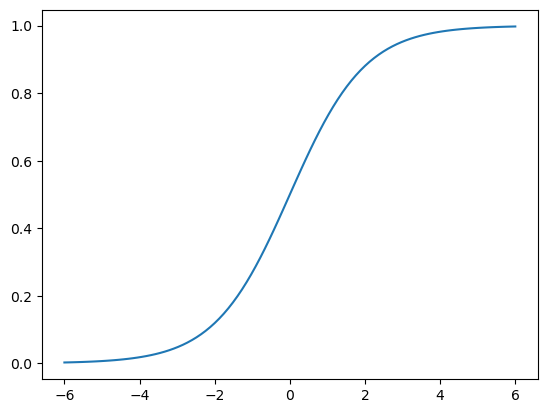

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))

# x is from -6 to 6 with .1 steps
x = np.linspace(-6, 6, 100)

plt.plot(x, logistic(x))
plt.show()

Anyhow, let us define the model...

In [4]:
log_reg = LogisticRegression(
                        random_state=1, 
                        C=200,
                        solver='lbfgs',
                        max_iter=10000)

To compute the accuracy of the model a cross validation score is now used

In [5]:
scores = cross_val_score(estimator=log_reg, # the model
                         X=iris.data, y=iris.target, # X, y
                         cv=5,       #number of folds - default 5-fold cross validation (see alternatives in documentation)
                         n_jobs=-1,  # use all CPU
                         verbose=1,   # verbose level 
                        )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


Note that for LogisticRegression, Score is the mean accuracy on the given test data and labels. And the scores for the different folds are: 

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score)

In [6]:
scores

array([1.        , 1.        , 0.93333333, 0.93333333, 1.        ])

Computing the average CV score - we can conclude that we expect the model to be around x% accurate on average

In [7]:
scores.mean()

0.9733333333333334

And the standard deviation is

In [8]:
scores.std()

0.03265986323710903

Having multiple splits of the data also provides some information about how sensitive our model is to the selection of the training dataset. For the iris dataset, we saw accuracies between ~90% and 100%. This is quite a range, and it provides us with an idea about how the model might perform in the worst case and best case scenarios when applied to new data.

The main disadvantage of cross-validation is increased computational cost. As we are now training k models instead of a single model, cross-validation will be roughly $k$ times slower than doing a single split of the data.



## Stratified k-Fold Cross-Validation and Other Strategies

### k-fold's

Splitting the dataset into k folds by starting with the first one-k-th part of the data, as described in the previous section, might not always be a good idea.

How would a 3 fold CV work over a dataset with the data ordered as in the iris dataset!? 

Remember that the targer is ordered as follows:

In [9]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Note that `cross_val_score` by default, uses **stratified k-fold cross-validation**: split the data such that the proportions between classes are the same in each fold as they are in the whole dataset. So the results were not so bad as using standard CV.

Let us see how bad it could be (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) if we use a standard k-fold CV (without shuffling and without stratification)

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, 
              shuffle=False)

scores = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=kfold #  int, cross-validation generator or an iterable, optional
               )

And the score are... [drum roll...]

In [11]:
scores

array([0., 0., 0.])

0! Why!!????? Can you guess?

With a 5-fold we have some improvements, but...

In [12]:
kfold = KFold(n_splits=5, 
              shuffle=False)

cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=kfold #  int, cross-validation generator or an iterable, optional
               )

array([1.        , 1.        , 0.86666667, 1.        , 0.83333333])

But, Kfold class allows us to shuffle the data
(https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [13]:
kfold = KFold(n_splits=3, 
              shuffle=True, 
              random_state=0)

cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=kfold 
               )

array([0.98, 0.98, 0.96])

### Stratified k-fold

Basically, this does the same as the first CV computation example, but with stratified data, i.e., the same proportion of classes in each fold as in the whole dataset. E.g., if the dataset has 100 samples of class 1 and 200 samples of class 2, each fold will have 33 samples of class 1 and 66 samples of class 2.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [14]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=skf #  int, cross-validation generator or an iterable, optional
               )
print(score)

[1.         1.         0.93333333 0.93333333 1.        ]


### Leave-one-out CV

Leave-one-out cross-validation: is as $k$-fold cross-validation where each fold is a single sample. For each split, you pick a single data point to be the test set. 
        
This can be very time consuming, particularly for large datasets, but sometimes provides better estimates on small datasets because  you are using as much of the data as possible for training.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=loo, #  int, cross-validation generator or an iterable, optional
                verbose=True,
                        n_jobs=-1
               )

print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.1s


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.6s finished


So, we have 150 samples, and we are training 150 models, meaning that we are training 150 models with 149 samples and testing them with the remaining sample. Resulting in a list of 150 scores.

In [16]:
len(score)

150

Now, we can compute the mean and standard deviation of the scores

In [17]:
mean = score.mean()
std = score.std()

print(f"Mean: {mean}\nStd: {std}")

Mean: 0.98
Std: 0.13999999999999999


We can also plot the scores and see how they vary. In this case, we see that the model fails to predict the class in 3 samples.

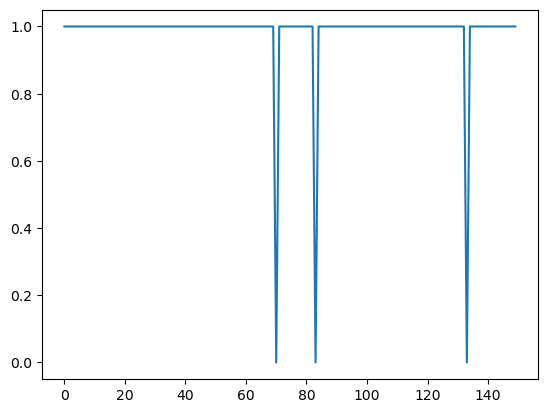

In [18]:
plt.plot(score)
plt.show()

### Shuffle-split cross-validation

In shuffle-split cross-validation, each split samples `train_size` many points for the training set and `test_size` many (disjoint) point for the test set.

This splitting is repeated `n_iter` times. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

In [19]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=10,      # number of splits
                  train_size=.75,   # test_size wil be complement of the train_size
                  random_state=1)

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target,  
                cv=ss)              #  use the ShuffleSplit object
print(score)

[1.         0.97368421 0.97368421 1.         0.94736842 1.
 0.97368421 1.         0.94736842 1.        ]


And the mean and standard deviation of the scores are

In [20]:
mean = score.mean()
std = score.std()

print(f"Mean: {mean}\nStd: {std}")

Mean: 0.9815789473684211
Std: 0.020553288620807002


### Stratified Shuffle-split cross-validation
There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleSplit, which can provide more reliable results for predicition tasks.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(
    n_splits=10, 
    train_size=.75, 
#     test_size wil be complement of the train_size
    random_state=1)

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=sss)
print(score)

[1.         1.         0.97368421 0.94736842 0.94736842 1.
 0.94736842 1.         1.         0.94736842]


In [22]:
mean = score.mean()
std = score.std()

print(f"Mean: {mean}\nStd: {std}")

Mean: 0.9763157894736842
Std: 0.024826266136991088


See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection for other options